# ROMS slices with OKEAN

okean.roms can be used to slice model input/output in many ways. This tutorial shows how to do it and exemplifies some visualisation capabilities of [okean.vis](https://github.com/martalmeida/okean/tree/master/okean/documentation/okean_vis.ipynb).

okean slices are returned as [okean.vis](https://github.com/martalmeida/okean/tree/master/okean/documentation/okean_vis.ipynb) objects. They include many useful features.

- [slicek](#slicek) - s-levels
- [slicez](#slicez) - z-const or 2d variable
- [slicei,j](#slicei,-slicej) - xi, eta
- [slicell](#slicell) - along x,y path
- [sliceiso](#sliceiso) - iso value
- [time series](#time-series) - time series/profiels
- [glider](#glider) - x,y,time


In [1]:
%matplotlib inline
from okean import roms

# load model output (local file or OPeNDAP)
f='http://tds.marine.rutgers.edu/thredds/dodsC/roms/scs/run201/his'
r=roms.His(f)

# if f does not include grid variables, do r=roms.His(f,grd)
# f can be his, avg or clm file

Show model domain:

TypeError: type object got multiple values for keyword argument 'lat_ts'

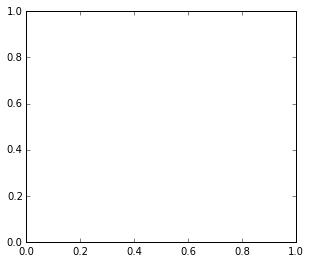

In [3]:
from okean import vis
vis.param['figure.figsize']=5,4
o=r.grid.plot();

ValueError: must either specify lat/lon values of corners (llcrnrlon,llcrnrlat,ucrnrlon,urcrnrlat) in degrees or width and height in meters

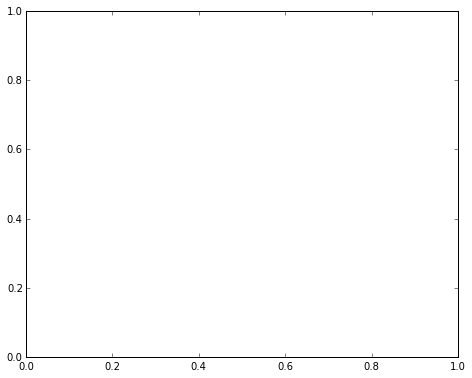

In [2]:
o=r.grid.plot(proj__name='stere');

##slicek

data extraction at s-levels

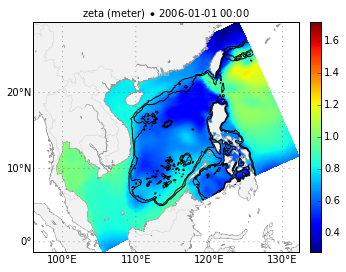

In [5]:
o=r.slicek('zeta',None,0) # varname, k_index, t_index
o.plot()

... and where is the data?

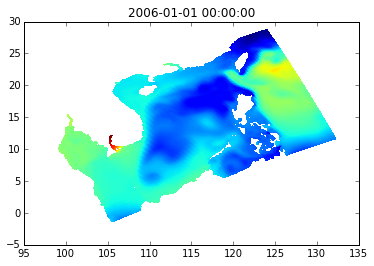

In [11]:
# inside x, y, v attributes
# time, distance and depth variables can also be provided,
# depending on the slice and depending on the slice options,
# and are inside attributes t, d, z
import pylab as pl
pl.pcolormesh(o.x,o.y,o.v);

pl.title(str(o.t));

Let us play with some visualization options...

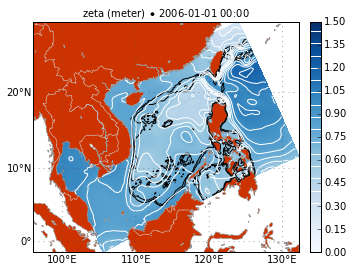

In [6]:
from okean import vis

# adding white contour levels:
p=vis.Data(x=o.x,y=o.y,v=o.v)
p.set_param(field__plot='contour',field__linecolors='w')
o.extra+=[p] # there is one default extra, the bathymetry

# and change clim, cmap and continents color
o.plot(cmap='Blues',clim=[0,1.5],continents=dict(color='#cc3300'));

# these changes could have been done with:
# o.set_param(cmap='Blues',clim=[0,1.5],continents=dict(color='#cc3300'))
# o.plot()

# now let's add the contour levels to the colorbar:
o.cb.add_lines(p.handles['mappable'][-1])

# to hide extra stuff just do o.extra=[] or o.plot(extras=0)

slicek can also be used to extract 2d variables:

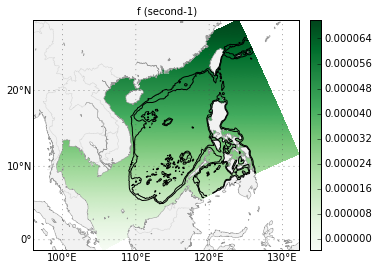

In [7]:
r.slicek('f',None,None).plot(cmap='Greens')

# slicez

data extraction at z-const

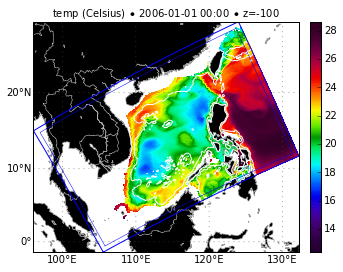

In [8]:
o=r.slicez('temp',-100,0)

# let's use the rainbow ncview colormap:
from okean.pl_tools import cm_ncview
opts=dict(cmap=cm_ncview.rainbow,continents=dict(color='k'))

# changing the isobaths to show, and its colors:
o.extra[0].set_param(cvals=(50,1000),linecolors='w')

# maybe we need to know the domain boundary.
# let's get the grid border and add it as an extra of o:
x,y=r.grid.border()
p=vis.Data(x=x,v=y)
o.extra+=[p]

o.plot(**opts)

# or get it, convert coordinates and plot it directly:
x,y=o.map(*r.grid.border(margin=10)) # border inside 10 cells
o.ax.plot(x,y,'b',lw=.5);

z-const slices uses a fortran extension for the vertical interpolations at each cell. The interplations can be linear of can use a cubic spline (default). Okean includes Carl de Boor's splines package pppack (http://pages.cs.wisc.edu/~deboor/). Let's evaluate the linear vs cubic spline interpolation in z-slices.


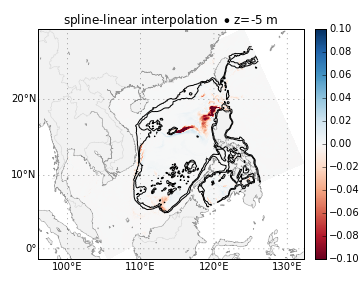
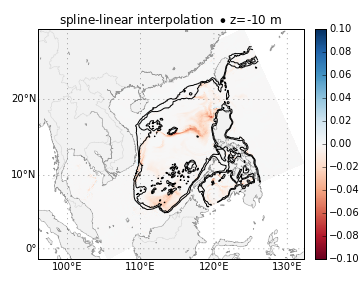
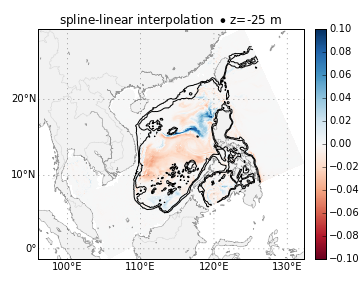
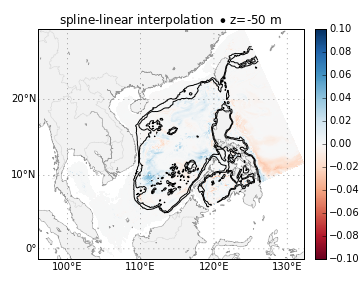
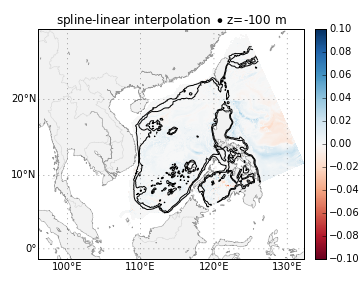
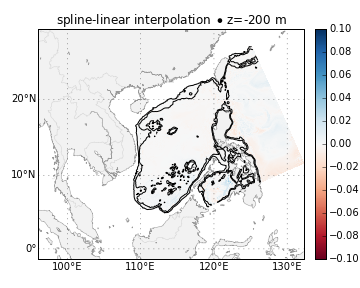
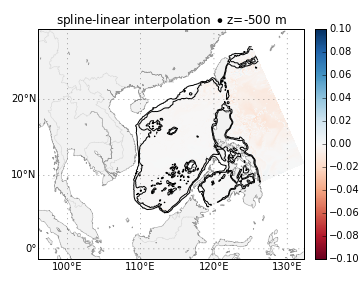
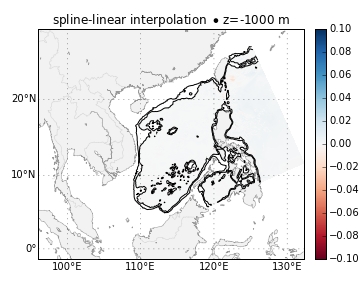
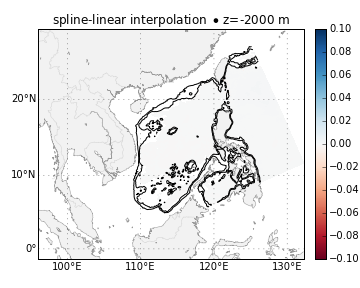

In [9]:
z=-5,-10,-25,-50,-100,-200,-500,-1000,-2000             

o=r.slicez('salt',z[0],0)
o.set_param(cmap='RdBu',clim=(-.1,.1),cvals=(50,1000))
o.plot(labels=0)
p=o.handles['mappable'][-1]


def anim(i):
    v0=r.slicez('salt',z[i],0,spline=0).v
    v1=r.slicez('salt',z[i],0,spline=1).v
    v=v1-v0
    p.set_array(v[:-1,:-1].ravel())
    p.axes.set_title('spline-linear interpolation $\\bullet$ z=%s m'%str(z[i]))
    return p


from matplotlib import animation
a = animation.FuncAnimation(o.fig, anim,frames=len(z))
from JSAnimation.IPython_display import display_animation
display_animation(a)

##slicei, slicej

vertical slice along model xi and eta

(0.0, 2108.2750750232522)

/home/mma/software/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


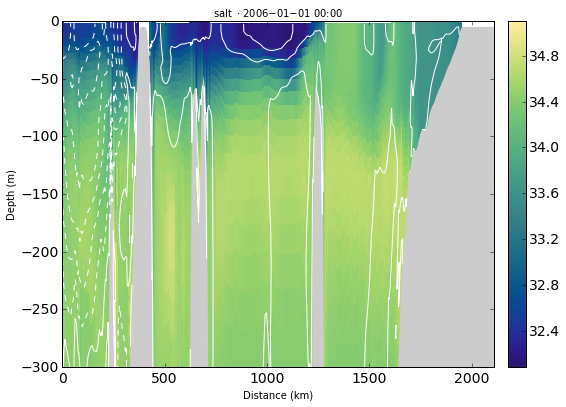

In [2]:
import cmocean # colormaps from Kristen Thyng (https://github.com/kthyng)
import numpy as np

o=r.slicei('salt',250,0)

o1=r.slicei('v',250,0)
o1.set_param(field__plot='contour',linecolors='w',cvals=np.arange(-1,1.1,.2))
o.extra+=[o1]
o.plot(cmap=cmocean.cm.salt)

#o.ax.set_ylim(o.extra[0].config['d1.y0'],0)
o.ax.set_ylim(-300,0)
o.ax.set_xlim(o.d.min(),o.d.max())

## slicell

slice along a Lon,Lat path --- mostrar em cima xemplos de error handling
ex: o=r.slice...
if o.msg: print o.msg
else: o.plot()


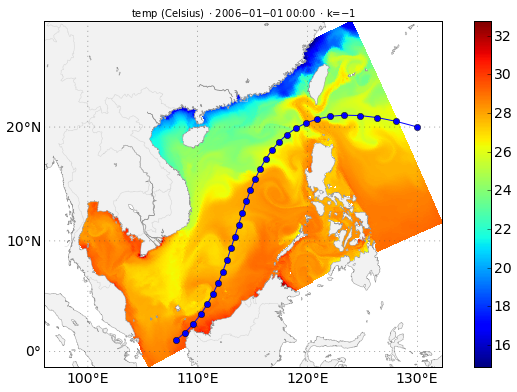

In [3]:
import numpy as np
from scipy import interpolate

# Let's create a smooth path with four points:
x=np.asarray([108,110,115,130.])
y=np.asarray([1,3,15,20.])
tck,u=interpolate.splprep([x,y],s=0)
xnew=np.linspace(0,1.,30)
x,y=interpolate.splev(xnew,tck,der=0)


o=r.slicek('temp',-1,0)
from okean import vis
o.extra=[vis.Data(x=x,v=y)]
o.extra[0].config['d1_line.options']['marker']='o'
o.plot()

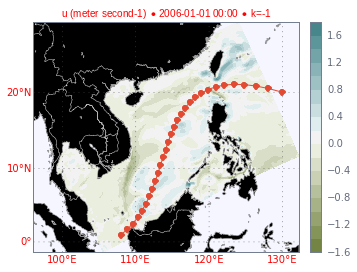

In [27]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=np.asarray([108,110,115,130.])
y=np.asarray([1,3,15,20.])
tck,u=interpolate.splprep([x,y],s=0)
xnew=np.linspace(0,1.,30)
out=interpolate.splev(xnew,tck,der=0)
x,y=out
from okean import vis
o.extra=[vis.Data(x=x,v=y)]
o.extra[0].config['d1_line.options']['marker']='o'
o.plot()

In [ ]:
o=r.slicell('salt',x,y,0)
o.plot()

In [30]:
o=r.time_series('salt',115,15,0)
o.config['1d_line.options']=dict(marker='o')
o.plot()
from okean import calc
v1=calc.Interp1_spl(o.z,o.v)(-1500)
v2=calc.Interp1_quad(o.z,o.v)(-1500)
v3=calc.Interp1_cub(o.z,o.v)(-1500)
import numpy as np
v4=np.interp(-1500,o.z,o.v)
print v1,v2,v3,v4
print r.TIME
o=r.time_series('salt',115,15,range(0,1000,10))
o.plot()

RuntimeError: NetCDF: I/O failure

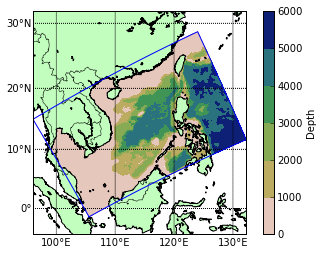

In [2]:

r.grid._proj={}
xl=r.grid.lon.min(),r.grid.lon.max()
yl=r.grid.lat.min()-3,r.grid.lat.max()+3
r.grid.plot(title='',xlim=xl,ylim=yl)


NEW PRJ !!
LOADING PROJ from cache !
WILL DRAW PROJECTION {'units': u'meter', 'slice': 'k=0', 'name': 'h'}
ADDING RIVERS !!!  0


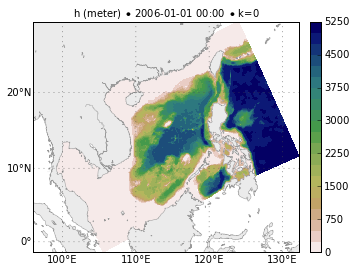

In [13]:
o=r.slicek('h',0,0)
import pylab as pl
o.set_param(**{'figure.figsize':(5,4),'proj.rivers_add':0,'field.cmap':pl.cm.gist_earth_r,'field.plot':'contourf'})
o.plot(extras=0)


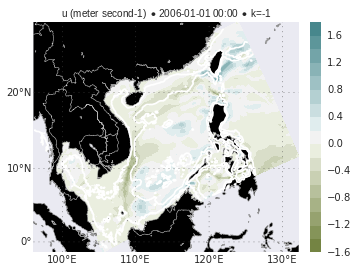

In [21]:
o=r.slicek('u',-1,0)
from okean import pl_tools
opts=dict(field__plot='contourf',figsize=(5,4),rivers_add=0,cmap=pl_tools.cm_ncview.rainbow,continents=dict(color='k'))

cmap=sns.diverging_palette(100,200,as_cmap=1)#rot=-1,start=2.3,as_cmap=1)
opts['cmap']=cmap
o.set_param(**opts)

o.extra[0].set_param(cvals=(50,1000),linecolors='w')
o.plot()
#sns.choose_diverging_palette();

NEW PRJ !!
LOADING PROJ from cache !
WILL DRAW PROJECTION {'units': u'Celsius', 'slice': 'z=-100', 'name': 'temp'}
ADDING RIVERS !!!  0
will plot extras...
plot


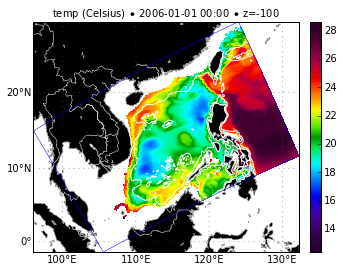

In [9]:
o=r.slicez('temp',-100,0)
#o.set_param(**opts)

o.extra[0].set_param(cvals=(50,1000),linecolors='w')
o.plot(**opts)

x,y=o.map(*r.grid.border())
o.ax.plot(x,y,'b',lw=.5)

NEW PRJ !!
LOADING PROJ from cache !
WILL DRAW PROJECTION {'units': u'Celsius', 'slice': 'z=-100', 'name': 'temp'}
ADDING RIVERS !!!  0
will plot extras...
plot


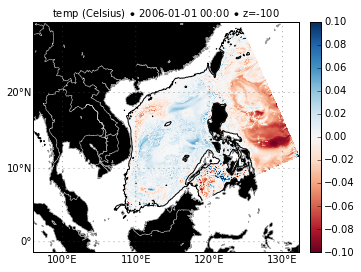

In [22]:
o=r.slicez('temp',-100,0,spline=1)
o_=r.slicez('temp',-100,0,spline=0)
o_.v-=o.v
#o_.v=o_.v-o.v

o_.set_param(cmap='RdBu',clim=(-.1,.1),continents=dict(color='g'))
o_.extra[0].set_param(cvals=(100,))
o_.plot(**opts)

In [23]:
print o.v.shape

(302, 472)


NEW PRJ !!
LOADING PROJ from cache !
WILL DRAW PROJECTION {'units': 'second-1', 'slice': 'Unk', 'name': 'rvort'}
ADDING RIVERS !!!  0


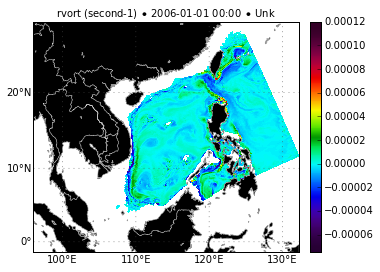

In [12]:
o=r.slice_derived('vort',-100,0)
#o.set_param(**opts)

#o.extra[0].set_param(cvals=(50,1000),linecolors='w')
o.plot(**opts)

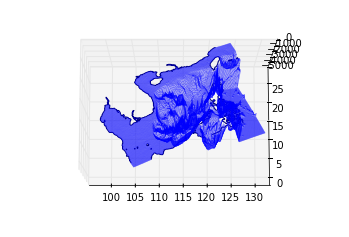

In [6]:
#o=r.sliceuv(-1,0)
#o.plot()
# ax=r.grid.plot3d(type='surface') # TVTK needed
ax=r.grid.plot3d(type='wireframe')
ax.view_init(elev=80., azim=-90)

WILL DRAW PROJECTION {'units': u'Celsius', 'slice': 'k=-1', 'name': 'temp'}
ADDING RIVERS !!!  0
will plot extras...
plot


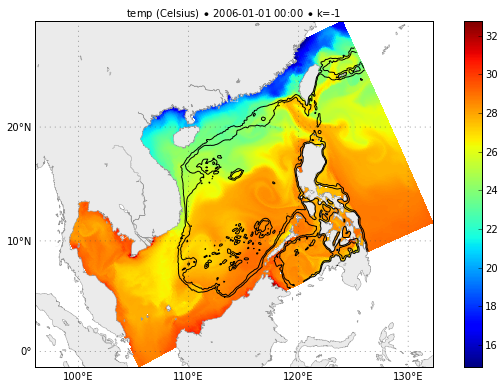

In [18]:
o.config['proj.rivers_add']=0
o.plot()

In [20]:
o=r.slicek('salt',-1,0)

WILL DRAW PROJECTION {'units': 'Unk', 'slice': 'k=-1', 'name': 'salt'}
ADDING RIVERS !!!  0


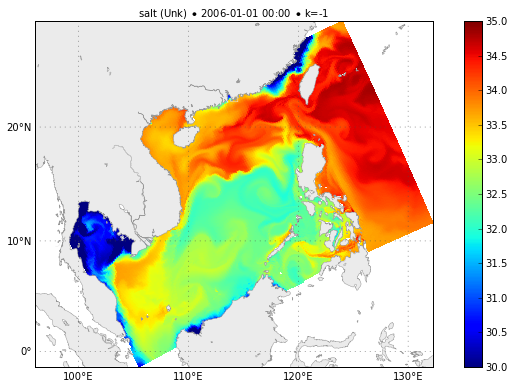

In [26]:
o.set_param(**{'field.clim':(30,35),'proj.rivers_add':0})
o.plot(extras=0)

NEW PRJ !!
LOADING PROJ from cache !
WILL DRAW PROJECTION {'units': 'Unk', 'slice': 'z=-1000', 'name': 'salt'}
ADDING RIVERS !!!  True
will plot extras...
plot


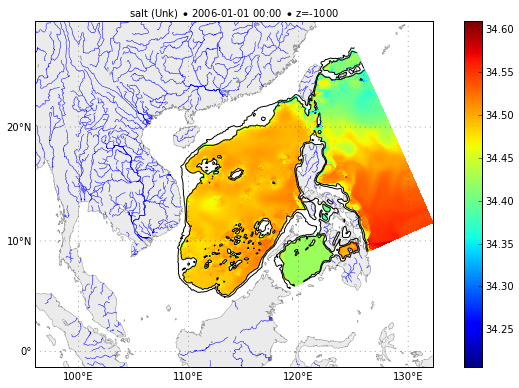

In [27]:
o=r.slicez('salt',-1000,0)
o.plot()

NEW PRJ !!
LOADING PROJ from cache !
WILL DRAW PROJECTION {'units': u'Celsius', 'slice': 'z=-500', 'name': 'temp'}
ADDING RIVERS !!!  True
will plot extras...
plot


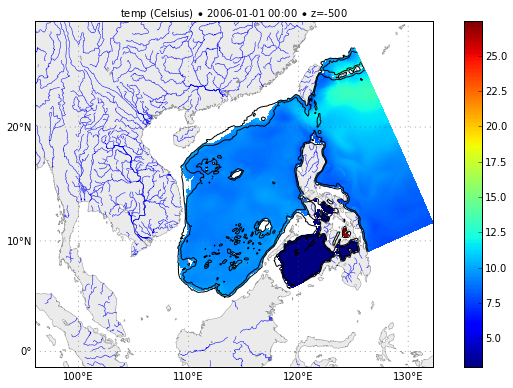

In [28]:
o=r.slicez('temp',-500,0)
o.plot()

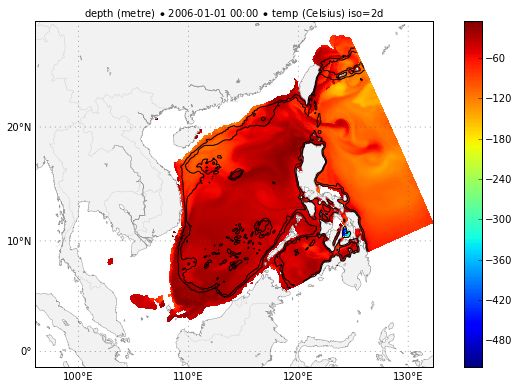

In [2]:
sst=r.slicek('temp',-1,0).v
zeta=r.slicek('zeta',0,0).v
o=r.sliceiso('temp',sst-1,0)
o.v=o.v-zeta
o.plot()

will plot extras...
fill_between


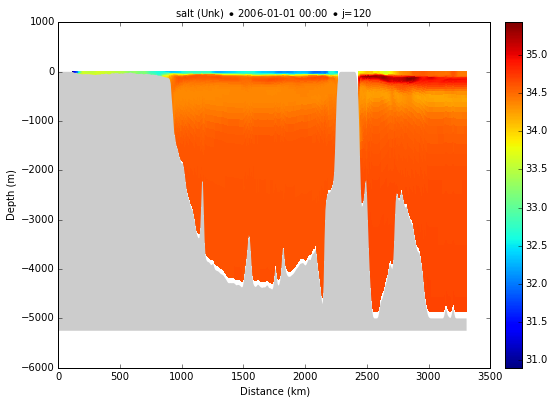

In [6]:
o=r.slicej('salt',120,0)
o.plot()

In [36]:
r.s_params

(7.0, 2.0, 250.0, 40, 2, 4)

In [4]:
r.showvar('ocean_time')


:: Dimensions:
   ocean_time   3589

:: Attributes:
   long_name    time since initialization        
   units        seconds since 2006-01-01 00:00:00
   calendar     gregorian                        
   field        time, scalar, series             
   _ChunkSize   1                                

:: Shape: (3589,)

:: Range: (0.0, 25833600.0)


In [44]:
from matplotlib import animation


0
0
1
2
3
4
5
6
7



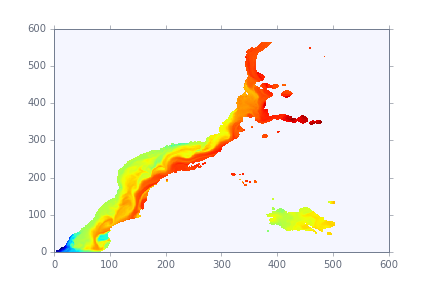
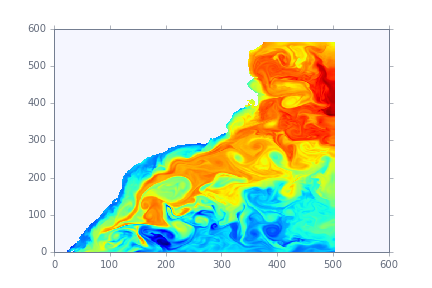
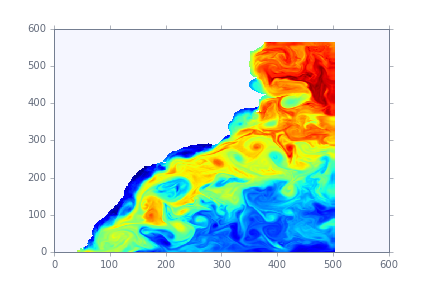
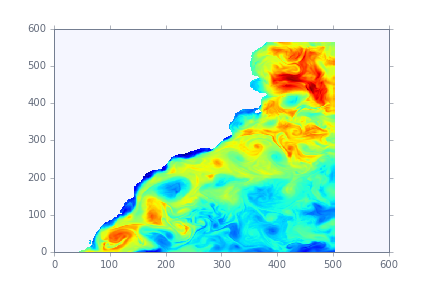
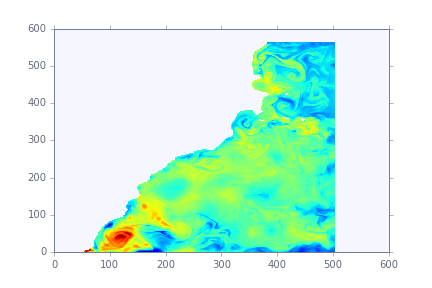
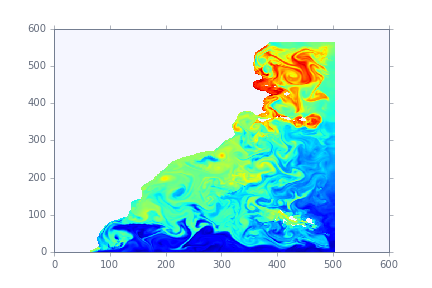
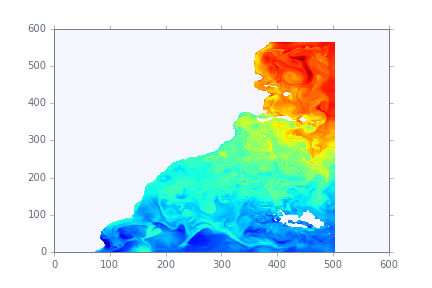
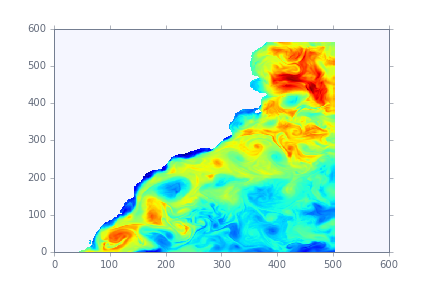

In [55]:
%matplotlib inline
fig=pl.figure()
ax=pl.axes()
z=[-10,-50,-100,-200,-500,-1000,-1500,-200]
def anim(i):
    ax.cla()
    o=rr.slicez('salt',z[i],0)
    print i
    ax.pcolormesh(o.v)
    
a = animation.FuncAnimation(fig, anim, frames=len(z))
pl.close()
from JSAnimation.IPython_display import display_animation
display_animation(a)



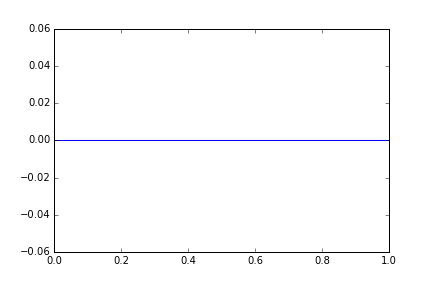
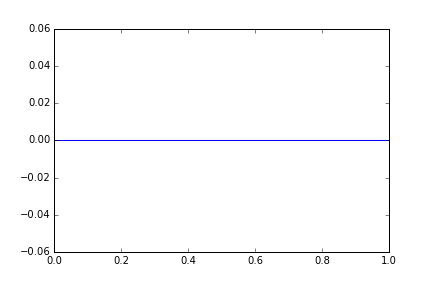
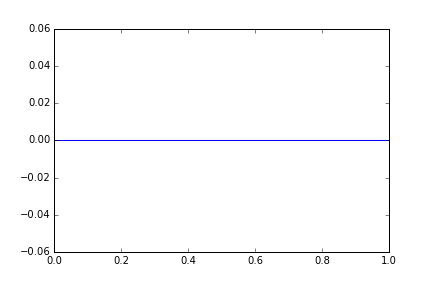
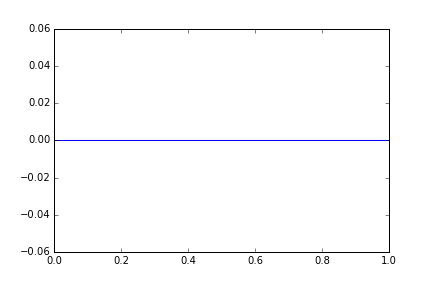
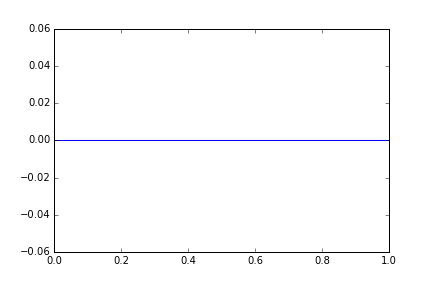
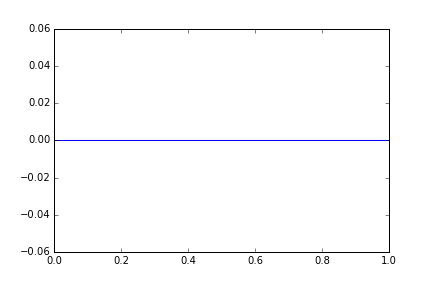
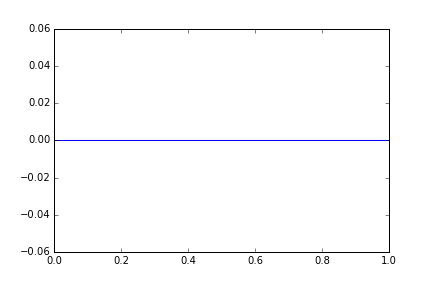
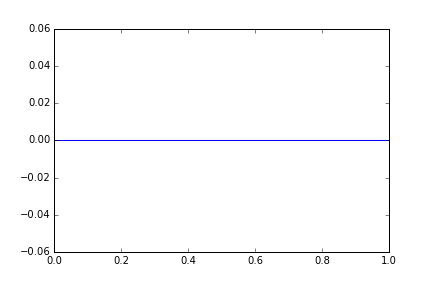
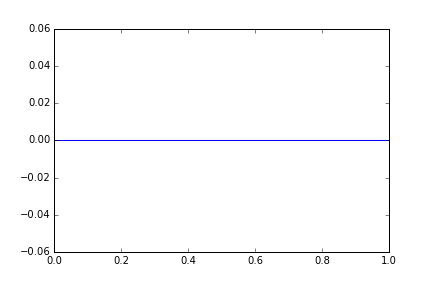
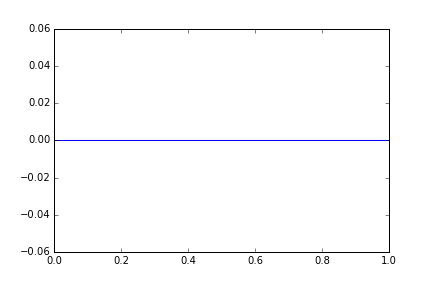

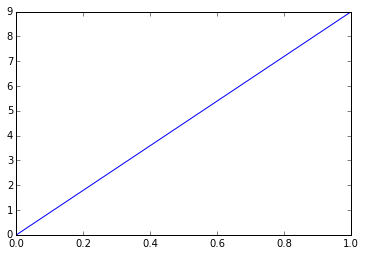

In [33]:
%matplotlib inline
fig=pl.figure()
a = animation.FuncAnimation(fig, anim, frames=10)
from JSAnimation.IPython_display import display_animation
display_animation(a)
